# helper function for plotting confusion matrix

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_conf_matrix(model, x_val, y_val):
    y_pred_val = model.predict(x_val)
    cf = confusion_matrix(y_val, y_pred_val)
    cf_row_sum = cf.sum(axis=1, keepdims=True)
    cf_normalized = cf/cf_row_sum
    sns.color_palette("YlOrBr", as_cmap=True)
    sns.heatmap(cf_normalized, annot=True, cmap='YlOrBr')
    plt.show()
    return cf

# helper function to fit,train,validate and get accuracy for all models

In [87]:
from sklearn.metrics import accuracy_score

def ev_model(model, x_train, y_train, x_val, y_val):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_val = model.predict(x_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return acc_train, acc_val

# Project_main

In [48]:
import pandas as pd
data =  pd.read_csv("bank.csv",sep=';')

In [49]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [50]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# Data Preprocessing 

## counting missing values 

In [51]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## counting culamns values and safely remove unwanted data

In [52]:
data.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [53]:
data_clean = data[data.job!="unknown"]

In [54]:
print(data.marital.value_counts())
print()
print(data.education.value_counts())
print()
print(data.contact.value_counts())
print()
print(data.contact.value_counts())

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64


## data encoding

### getting unique values

In [55]:
data_clean.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [56]:
print(data_clean["job"].unique(), end='\n\n')
print(data_clean["marital"].unique(), end='\n\n')
print(data_clean["education"].unique(), end='\n\n')
print(data_clean["default"].unique(), end='\n\n')
print(data_clean["housing"].unique(), end='\n\n')
print(data_clean["loan"].unique(), end='\n\n')
print(data_clean["contact"].unique(), end='\n\n')
print(data_clean["month"].unique(), end='\n\n')
print(data_clean["poutcome"].unique(), end='\n\n')
print(data_clean["y"].unique(), end='\n\n')


['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']

['married' 'single' 'divorced']

['primary' 'secondary' 'tertiary' 'unknown']

['no' 'yes']

['no' 'yes']

['no' 'yes']

['cellular' 'unknown' 'telephone']

['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

['unknown' 'failure' 'other' 'success']

['no' 'yes']



### numirecal encoding 

In [57]:
month = {"jan" : 1, "feb" : 2, "mar" : 3 ,"apr" : 4, "may" : 5, "jun" : 6,
"jul" : 7, "aug" : 8, "sep" : 9,"oct" : 10, "nov" : 11 , "dec" : 12}
data_encoded=data_clean.replace({"default":{"yes": 1 ,"no": 0},
                                "housing":{"yes": 1 ,"no": 0},
                                "loan":{"yes": 1 ,"no": 0},
                                "month":month,
                                "y":{"yes": 1 ,"no": 0}})

In [58]:
data_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,10,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,5,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,4,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,6,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,5,226,1,-1,0,unknown,0


### one hot encoding

In [59]:
data_encoded_v2 = pd.get_dummies(data_encoded)

In [60]:
data_encoded_v2.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
poutcome_failure       uint8
poutcome_other

# end of preprocessing

# data splitting

In [61]:
data_input=data_encoded_v2.drop(columns="y")
data_output=data_encoded_v2["y"]
data_input.head()
#data_output.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,10,79,1,-1,...,0,0,0,1,0,0,0,0,0,1
1,33,0,4789,1,1,11,5,220,1,339,...,1,0,0,1,0,0,1,0,0,0
2,35,0,1350,1,0,16,4,185,1,330,...,0,1,0,1,0,0,1,0,0,0
3,30,0,1476,1,1,3,6,199,4,-1,...,0,1,0,0,0,1,0,0,0,1
4,59,0,0,1,0,5,5,226,1,-1,...,1,0,0,0,0,1,0,0,0,1


In [62]:
from sklearn.model_selection import train_test_split
X, x_test, Y,y_test = train_test_split(data_input, data_output, test_size=35, random_state=3)
x_train, x_val, y_train,y_val = train_test_split(X, Y, test_size=35, random_state=3)

In [63]:
x_train.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3681,30,1,239,1,0,21,5,412,1,-1,...,1,0,0,0,0,1,0,0,0,1
3898,59,0,748,0,0,29,5,184,1,-1,...,0,0,0,0,0,1,0,0,0,1
4351,39,0,36,0,0,29,8,70,2,-1,...,1,0,0,1,0,0,0,0,0,1
840,28,1,-298,1,0,3,6,559,7,-1,...,1,0,0,0,0,1,0,0,0,1
910,40,0,952,0,1,12,6,140,1,-1,...,1,0,0,0,0,1,0,0,0,1


In [64]:
data_output.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

# looking if data unbalaced and seeking to solve

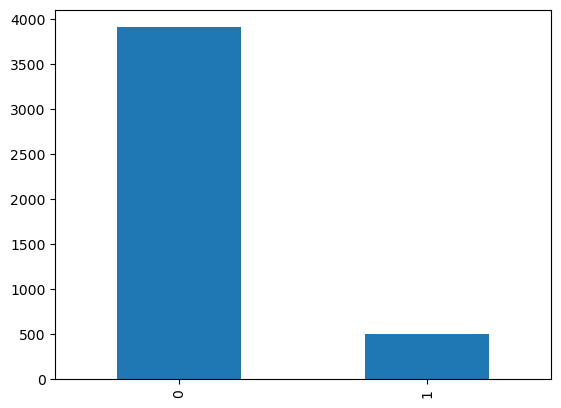

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
y_train.value_counts().plot.bar()
plt.show()

In [69]:
from imblearn.under_sampling import RandomUnderSampler as RUS
from imblearn.over_sampling import RandomOverSampler as OUS

In [70]:
rus = RUS(sampling_strategy=.5, random_state=3)
x_train_us, y_train_us = rus.fit_resample(x_train, y_train)

ous = OUS(sampling_strategy=1, random_state=3)
x_train_os, y_train_os = ous.fit_resample(x_train_us, y_train_us)

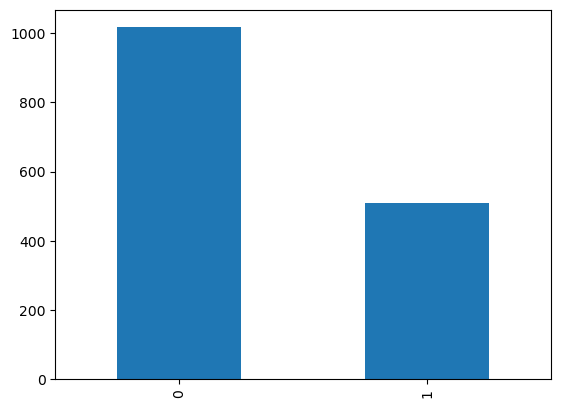

In [71]:
y_train_us.value_counts().plot.bar()
plt.show()

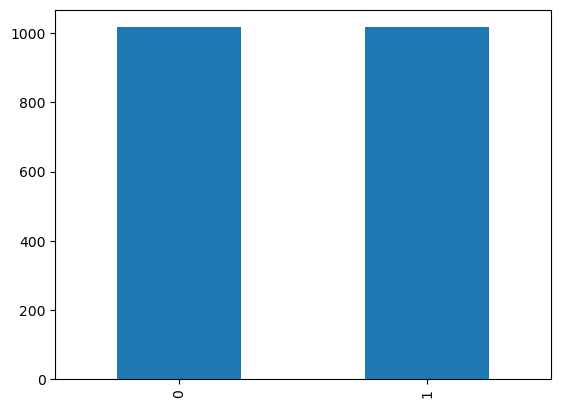

In [72]:
y_train_os.value_counts().plot.bar()
plt.show()

# model: suport vector machine( SVM )

In [74]:
from sklearn import svm

In [75]:
SVM_model = svm.SVC(kernel='linear', random_state=0)
ev_model(SVM_model, x_train_os, y_train_os, x_val, y_val)

(0.7942913385826772, 0.6571428571428571)

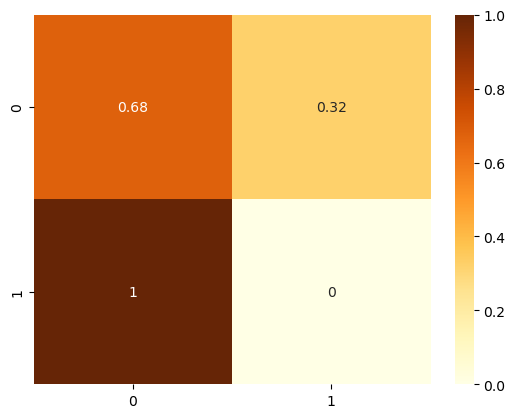

array([[23, 11],
       [ 1,  0]], dtype=int64)

In [81]:
plot_conf_matrix(SVM_model, x_val, y_val)

# tunning hyper-parameters

In [88]:
SVM_kernels = ["linear", "poly", "rbf", "sigmoid"]
acc_train_values = []
acc_val_values = []

for SVM_kernel in SVM_kernels:
    SVM_model = svm.SVC(kernel=SVM_kernel, random_state=0)
    acc_train, acc_val = ev_model(SVM_model, x_train_os, y_train_os, x_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results_Best_kernel = pd.DataFrame({
    'SVM_kernels': SVM_kernels,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_Best_kernel

,SVM_kernels,acc_train,acc_val
0,linear,0.794291,0.657143
1,poly,0.559547,0.942857
2,rbf,0.745079,0.771429
3,sigmoid,0.511319,0.485714


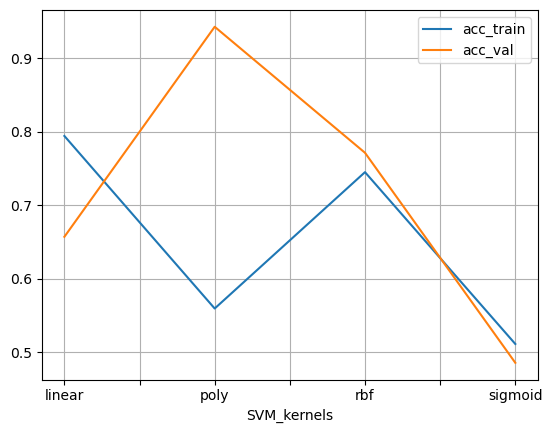

In [91]:
results_Best_kernel.plot(x='SVM_kernels', y=['acc_train', 'acc_val'])
plt.grid()
plt.show()

rbf is the best accuracy

In [96]:
SVM_best_model = svm.SVC(kernel='linear', random_state=0)
ev_model(SVM_best_model, x_train_os, y_train_os, x_test, y_test)


(0.7942913385826772, 0.7428571428571429)

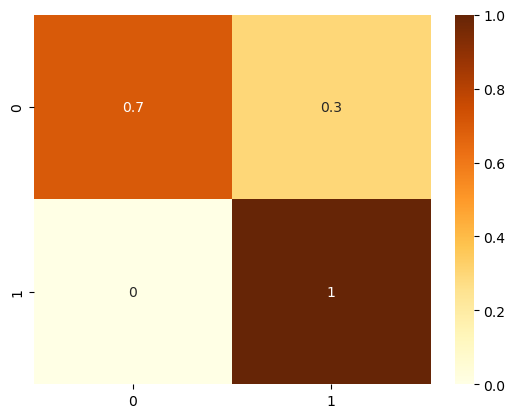

array([[21,  9],
       [ 0,  5]], dtype=int64)

In [97]:
plot_conf_matrix(SVM_best_model, x_test, y_test)

# KNN Model

In [99]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=10)
ev_model(KNN_model, x_train_os, y_train_os, x_val, y_val)

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

(0.8075787401574803, 0.8285714285714286)

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


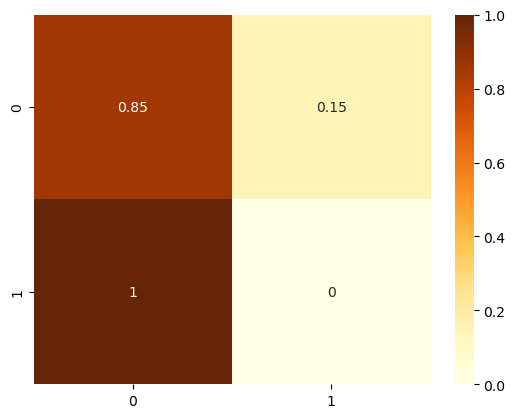

array([[29,  5],
       [ 1,  0]], dtype=int64)

In [100]:
plot_conf_matrix(KNN_model, x_val, y_val)

In [110]:
K = list(range(1,10))
acc_train_values = []
acc_val_values = []

for k in K:
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    acc_train, acc_val = ev_model(KNN_model, x_train_os, y_train_os, x_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results_max_K = pd.DataFrame({
    'K': K,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_max_K

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,K,acc_train,acc_val
0,1,1.000000,0.857143
1,2,0.959154,0.857143
2,3,0.889764,0.771429
3,4,0.867126,0.857143
4,5,0.848425,0.800000
5,6,0.832677,0.857143
6,7,0.823327,0.800000
7,8,0.809547,0.800000
8,9,0.808563,0.685714


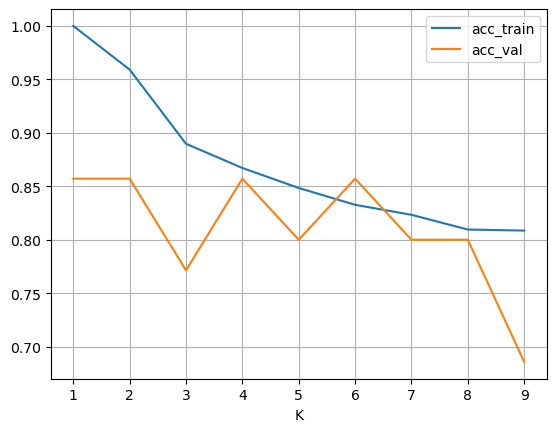

In [113]:
results_max_K.plot(x='K', y=['acc_train', 'acc_val'])
plt.grid()
plt.show()

4 is the best k for KNN

In [114]:
KNN_best_model = KNeighborsClassifier(n_neighbors=4)
ev_model(KNN_best_model, x_train_os, y_train_os, x_test, y_test)


D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

(0.8671259842519685, 0.7714285714285715)

D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


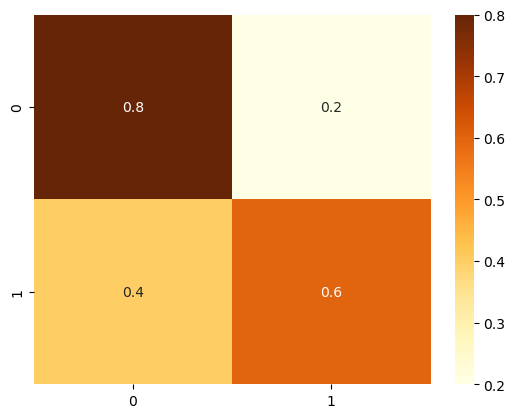

array([[24,  6],
       [ 2,  3]], dtype=int64)

In [115]:
plot_conf_matrix(KNN_best_model, x_test, y_test)

# Naive Bais

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [125]:
NB_model = BernoulliNB()
ev_model(NB_model, x_train, y_train, x_val, y_val)

(0.8193972354407433, 0.9142857142857143)

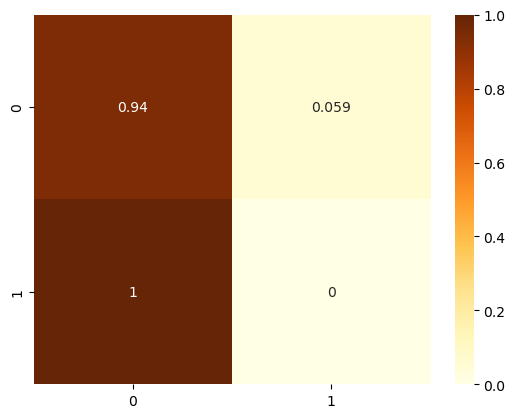

array([[32,  2],
       [ 1,  0]], dtype=int64)

In [126]:
plot_conf_matrix(NB_model, x_val, y_val)

In [142]:
NB_models = [GaussianNB(), BernoulliNB(),]
acc_train_values = []
acc_val_values = []
model_name = []

for NB_model in NB_models:
    
    acc_train, acc_val = ev_model(NB_model, x_train_os, y_train_os, x_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    model_name.append(NB_model.__class__.__name__)
    
results_best_NB_model = pd.DataFrame({
    'NB_models': model_name,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
    
})

results_best_NB_model

,NB_models,acc_train,acc_val
0,GaussianNB,0.693406,0.800000
1,BernoulliNB,0.643209,0.742857


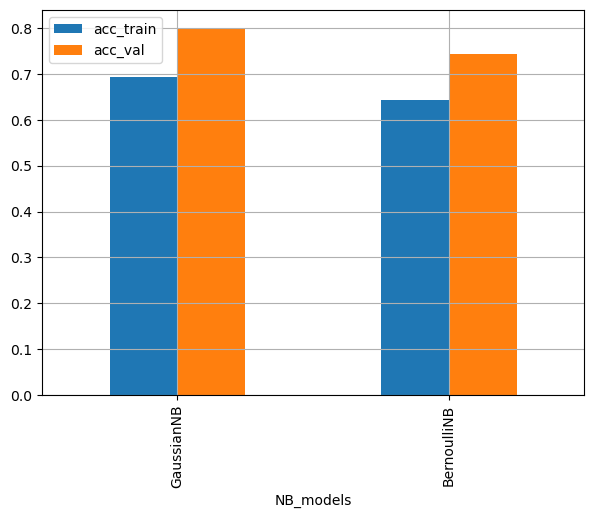

In [149]:
results_best_NB_model.plot.bar(x='NB_models', y=['acc_train', 'acc_val'], figsize=(7, 5))
plt.grid()
plt.show()

GaussianNB is the best model

In [201]:
NB_best_model = GaussianNB()
ev_model(NB_best_model, x_train_os, y_train_os, x_test, y_test)


(0.6934055118110236, 0.7428571428571429)

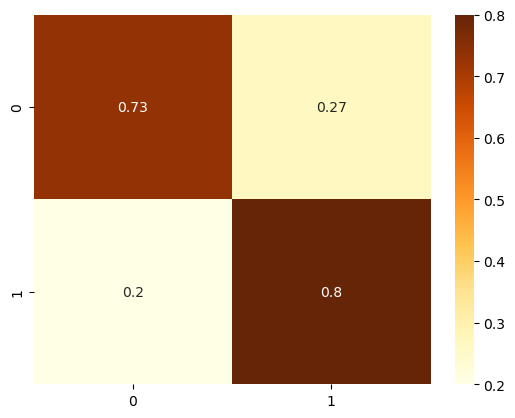

array([[22,  8],
       [ 1,  4]], dtype=int64)

In [152]:
plot_conf_matrix(NB_best_model, x_test, y_test)

# Decision Tree Model

In [153]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
ev_model(DT_model, x_train, y_train, x_val, y_val)

(1.0, 0.8857142857142857)

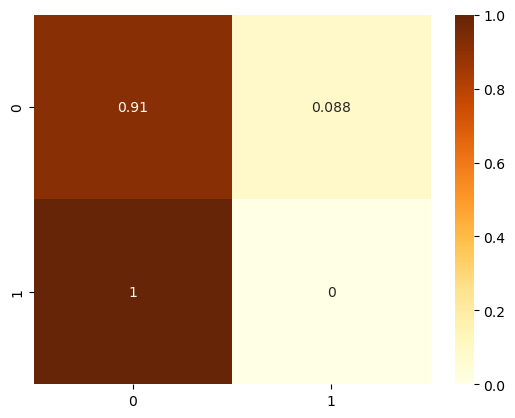

array([[31,  3],
       [ 1,  0]], dtype=int64)

In [154]:
plot_conf_matrix(DT_model, x_val, y_val)

In [157]:
max_depth = list(range(1,20))
acc_train_values = []
acc_val_values = []

for depth in max_depth:
    DT_model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    acc_train, acc_val = ev_model(DT_model, x_train_os, y_train_os, x_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results_max_depth = pd.DataFrame({
    'max_depth': max_depth,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_max_depth

,max_depth,acc_train,acc_val
0,1,0.741634,0.571429
1,2,0.741634,0.571429
2,3,0.787894,0.657143
3,4,0.797244,0.685714
4,5,0.825787,0.714286
5,6,0.843012,0.800000
6,7,0.863681,0.771429
7,8,0.891732,0.771429
8,9,0.914862,0.771429
9,10,0.929134,0.800000


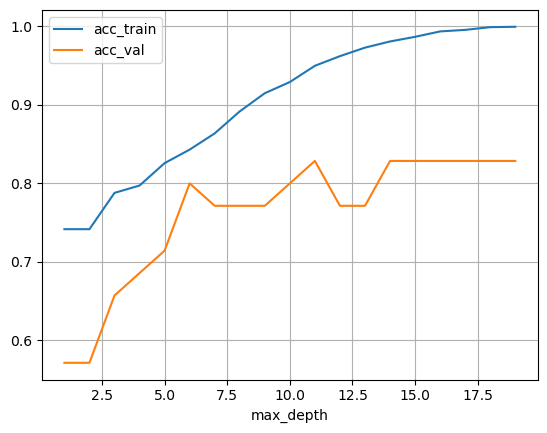

In [162]:
results_max_depth.plot(x='max_depth', y=['acc_train', 'acc_val'])
plt.grid()
plt.show()

deciton tree best depth is 11

In [168]:
from sklearn.tree import DecisionTreeClassifier
DT_best_model = DecisionTreeClassifier(max_depth=11, random_state=0)
ev_model(DT_best_model, x_train, y_train, x_test, y_test)

(0.9619306594153637, 0.8857142857142857)

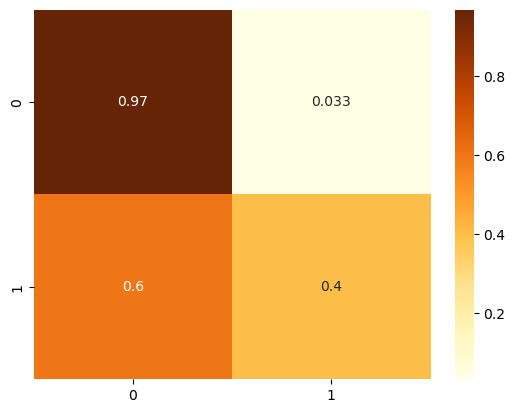

array([[29,  1],
       [ 3,  2]], dtype=int64)

In [169]:
plot_conf_matrix(DT_best_model, x_test, y_test)

# Random Forest Model

In [170]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
ev_model(RF_model, x_train_os, y_train_os, x_val, y_val)

(0.8006889763779528, 0.7142857142857143)

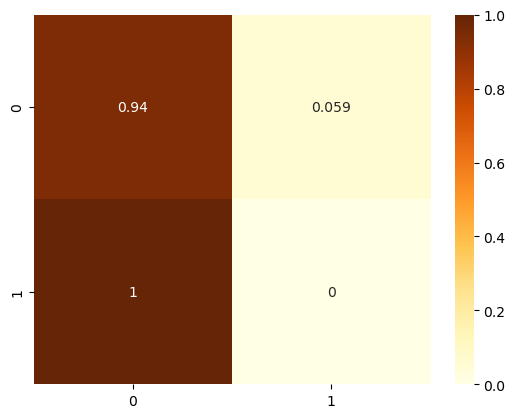

array([[32,  2],
       [ 1,  0]], dtype=int64)

In [171]:
plot_conf_matrix(DT_model, x_val, y_val)

In [177]:
n_estimators = [10,15,25,50,100,150,200,300,400]
acc_train_values = []
acc_val_values = []

for n_estimator in n_estimators:
    RF_model = RandomForestClassifier(n_estimators=n_estimator, max_depth=3, random_state=0)
    acc_train, acc_val = ev_model(DT_model, x_train_os, y_train_os, x_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results_best_n_estimator = pd.DataFrame({
    'n_estimators': n_estimators,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_best_n_estimator

,n_estimators,acc_train,acc_val
0,10,0.949803,0.828571
1,15,0.949803,0.828571
2,25,0.949803,0.828571
3,50,0.949803,0.828571
4,100,0.949803,0.828571
5,150,0.949803,0.828571
6,200,0.949803,0.828571
7,300,0.949803,0.828571
8,400,0.949803,0.828571


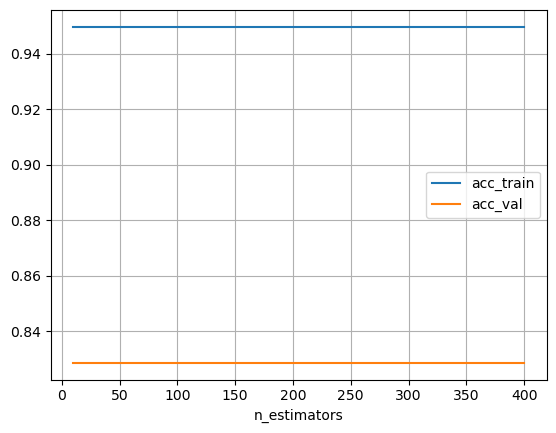

In [178]:
results_best_n_estimator.plot(x='n_estimators', y=['acc_train', 'acc_val'])
plt.grid()
#plt.xticks(n_estimators)
plt.show()

no effect for n_estimators value

In [179]:
max_depth = list(range(1,20))
acc_train_values = []
acc_val_values = []

for depth in max_depth:
    RF_model = RandomForestClassifier(n_estimators=50, max_depth=depth, random_state=0)
    acc_train, acc_val = ev_model(RF_model, x_train_os, y_train_os, x_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results_max_depth = pd.DataFrame({
    'max_depth': max_depth,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_max_depth

,max_depth,acc_train,acc_val
0,1,0.778051,0.628571
1,2,0.772146,0.685714
2,3,0.810039,0.742857
3,4,0.817913,0.714286
4,5,0.841043,0.714286
5,6,0.862697,0.714286
6,7,0.885827,0.714286
7,8,0.911417,0.742857
8,9,0.942421,0.742857
9,10,0.962106,0.742857


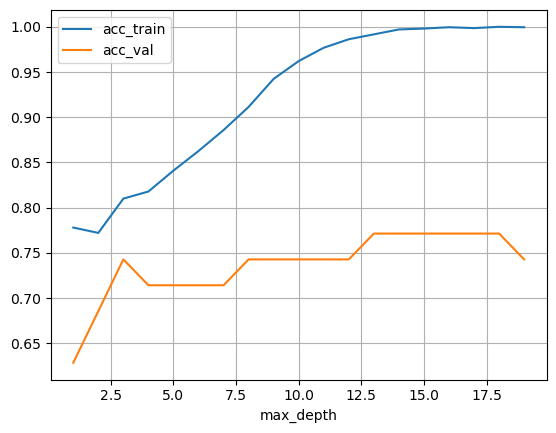

In [180]:
results_max_depth.plot(x='max_depth', y=['acc_train', 'acc_val'])
plt.grid()
plt.show()

13 is the best depth for random forest model

In [184]:
RF_best_model = RandomForestClassifier(n_estimators=100, max_depth=13, random_state=0)
ev_model(RF_best_model, x_train_os, y_train_os, x_test, y_test)

(0.9936023622047244, 0.8857142857142857)

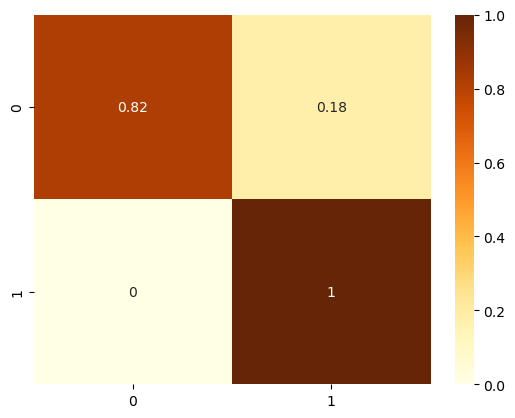

array([[28,  6],
       [ 0,  1]], dtype=int64)

In [185]:
plot_conf_matrix(DT_model, x_val, y_val)

# Logistic Regrission Model

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

LR_model = Pipeline([
    ('fs', StandardScaler()),
    ('model', LogisticRegression(random_state=0))
])
ev_model(LR_model, x_train_os, y_train_os, x_val, y_val)

(0.7947834645669292, 0.7428571428571429)

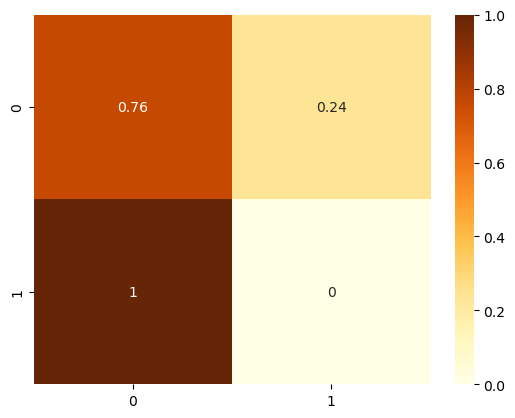

array([[26,  8],
       [ 1,  0]], dtype=int64)

In [197]:
plot_conf_matrix(LR_model, x_val, y_val)

In [192]:
C = [0.000001,0.001, 0.01, 0.1, 1, 10, 100, 1000,100000]
acc_train_values = []
acc_val_values = []

for c in C:
    LR_model = Pipeline([
    ('fs', StandardScaler()),
    ('model', LogisticRegression(C=c,random_state=0))])
    acc_train, acc_val = ev_model(RF_model, x_train_os, y_train_os, x_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results_best_C = pd.DataFrame({
    'C': C,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_best_C

,C,acc_train,acc_val
0,0.000001,0.999508,0.742857
1,0.001000,0.999508,0.742857
2,0.010000,0.999508,0.742857
3,0.100000,0.999508,0.742857
4,1.000000,0.999508,0.742857
5,10.000000,0.999508,0.742857
6,100.000000,0.999508,0.742857
7,1000.000000,0.999508,0.742857
8,100000.000000,0.999508,0.742857


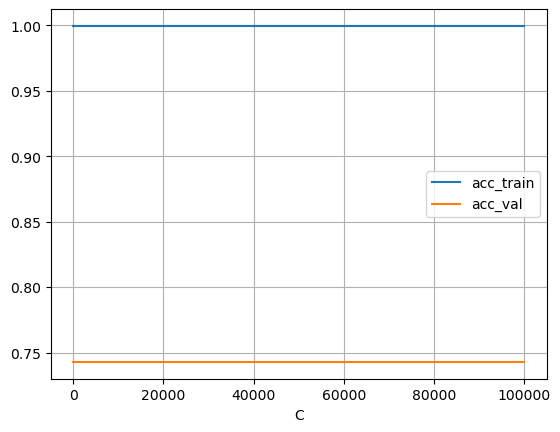

In [193]:
results_best_C.plot(x='C', y=['acc_train', 'acc_val'])
plt.grid()
plt.show()

no effect for C_values

In [200]:
LR_best_model = LR_model
ev_model(LR_best_model, x_train_os, y_train_os, x_test, y_test)

(0.7947834645669292, 0.8285714285714286)

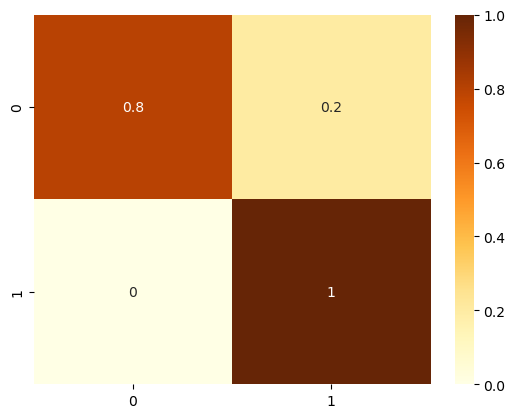

array([[24,  6],
       [ 0,  5]], dtype=int64)

In [198]:
plot_conf_matrix(LR_model, x_test, y_test)